In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, roc_curve, auc, roc_auc_score
)

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC

# --- Custom metric functions ---
def calculate_confusion_elements(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP, TN, FP, FN

def accuracy(tp, tn, fp, fn):
    return (tp + tn) / (tp + tn + fp + fn)

def precision(tp, fp):
    return tp / (tp + fp) if tp + fp > 0 else 0

def recall(tp, fn):
    return tp / (tp + fn) if tp + fn > 0 else 0

def specificity(tn, fp):
    return tn / (tn + fp) if tn + fp > 0 else 0

def npv(tn, fn):
    return tn / (tn + fn) if tn + fn > 0 else 0

def f1(prec, rec):
    return 2 * (prec * rec) / (prec + rec) if prec + rec > 0 else 0

def mcc(tp, tn, fp, fn):
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return numerator / denominator if denominator != 0 else 0

# --- Calculate manually ---
TP, TN, FP, FN = calculate_confusion_elements(y_test, y_pred)

acc = accuracy(TP, TN, FP, FN)
prec = precision(TP, FP)
rec = recall(TP, FN)
spec = specificity(TN, FP)
npv_val = npv(TN, FN)
f1_val = f1(prec, rec)
mcc_val = mcc(TP, TN, FP, FN)

# --- Print manual metrics ---
print("Manual Metrics:")
print(f"TP={TP}, TN={TN}, FP={FP}, FN={FN}")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall (Sensitivity): {rec:.4f}")
print(f"Specificity: {spec:.4f}")
print(f"Negative Predictive Value (NPV): {npv_val:.4f}")
print(f"F1 Score: {f1_val:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc_val:.4f}")

# --- scikit-learn metrics ---
print("\nScikit-learn Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"MCC: {matthews_corrcoef(y_test, y_pred):.4f}")

# --- Confusion Matrix ---
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- ROC & AUC ---
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Random probabilities for comparison
random_probs = np.random.uniform(0, 1, size=len(y_test))
fpr_rand, tpr_rand, _ = roc_curve(y_test, random_probs)
auc_rand = auc(fpr_rand, tpr_rand)

# Plot ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Model (AUC = {roc_auc:.4f})')
plt.plot(fpr_rand, tpr_rand, linestyle='--', label=f'Random (AUC = {auc_rand:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


Manual Metrics:
TP=106, TN=61, FP=2, FN=2
Accuracy: 0.9766
Precision: 0.9815
Recall (Sensitivity): 0.9815
Specificity: 0.9683
Negative Predictive Value (NPV): 0.9683
F1 Score: 0.9815
Matthews Correlation Coefficient (MCC): 0.9497

Scikit-learn Metrics:
Accuracy: 0.9766
Precision: 0.9815
Recall: 0.9815
F1 Score: 0.9815
MCC: 0.9497


ModuleNotFoundError: No module named 'seaborn'

In [2]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Manual Metrics:
TP=106, TN=61, FP=2, FN=2
Accuracy: 0.9766
Precision: 0.9815
Recall (Sensitivity): 0.9815
Specificity: 0.9683
Negative Predictive Value (NPV): 0.9683
F1 Score: 0.9815
Matthews Correlation Coefficient (MCC): 0.9497

Scikit-learn Metrics:
Accuracy: 0.9766
Precision: 0.9815
Recall: 0.9815
F1 Score: 0.9815
MCC: 0.9497


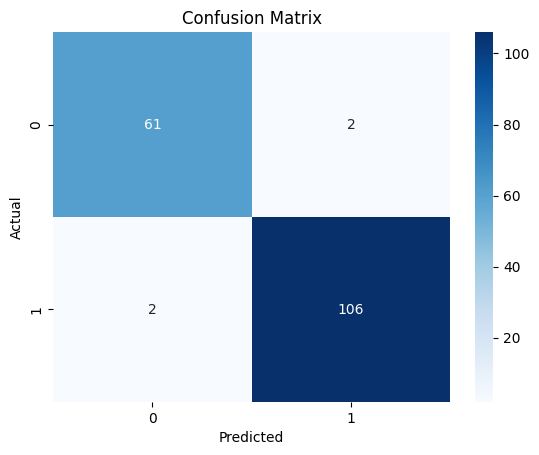

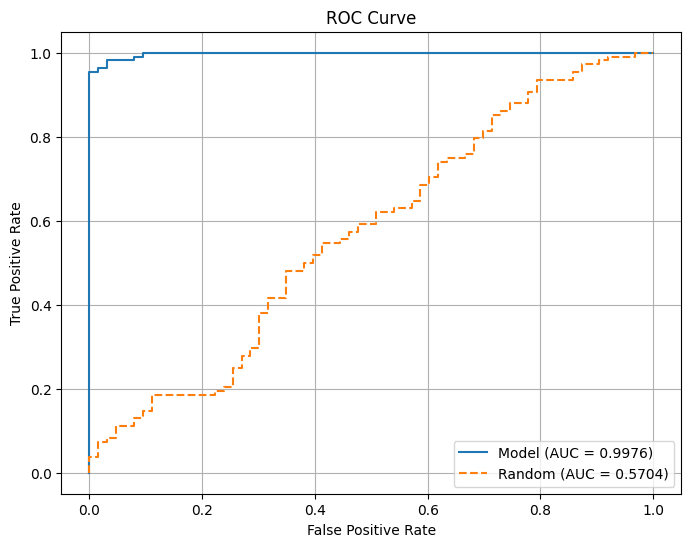

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, roc_curve, auc, roc_auc_score
)

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC

# --- Custom metric functions ---
def calculate_confusion_elements(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP, TN, FP, FN

def accuracy(tp, tn, fp, fn):
    return (tp + tn) / (tp + tn + fp + fn)

def precision(tp, fp):
    return tp / (tp + fp) if tp + fp > 0 else 0

def recall(tp, fn):
    return tp / (tp + fn) if tp + fn > 0 else 0

def specificity(tn, fp):
    return tn / (tn + fp) if tn + fp > 0 else 0

def npv(tn, fn):
    return tn / (tn + fn) if tn + fn > 0 else 0

def f1(prec, rec):
    return 2 * (prec * rec) / (prec + rec) if prec + rec > 0 else 0

def mcc(tp, tn, fp, fn):
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return numerator / denominator if denominator != 0 else 0

# --- Calculate manually ---
TP, TN, FP, FN = calculate_confusion_elements(y_test, y_pred)

acc = accuracy(TP, TN, FP, FN)
prec = precision(TP, FP)
rec = recall(TP, FN)
spec = specificity(TN, FP)
npv_val = npv(TN, FN)
f1_val = f1(prec, rec)
mcc_val = mcc(TP, TN, FP, FN)

# --- Print manual metrics ---
print("Manual Metrics:")
print(f"TP={TP}, TN={TN}, FP={FP}, FN={FN}")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall (Sensitivity): {rec:.4f}")
print(f"Specificity: {spec:.4f}")
print(f"Negative Predictive Value (NPV): {npv_val:.4f}")
print(f"F1 Score: {f1_val:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc_val:.4f}")

# --- scikit-learn metrics ---
print("\nScikit-learn Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"MCC: {matthews_corrcoef(y_test, y_pred):.4f}")

# --- Confusion Matrix ---
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- ROC & AUC ---
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Random probabilities for comparison
random_probs = np.random.uniform(0, 1, size=len(y_test))
fpr_rand, tpr_rand, _ = roc_curve(y_test, random_probs)
auc_rand = auc(fpr_rand, tpr_rand)

# Plot ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Model (AUC = {roc_auc:.4f})')
plt.plot(fpr_rand, tpr_rand, linestyle='--', label=f'Random (AUC = {auc_rand:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


=== Manual Calculations ===
TP=106, TN=61, FP=2, FN=2
Accuracy: 0.9766
Precision: 0.9815
Recall (Sensitivity): 0.9815
Specificity: 0.9683
Negative Predictive Value: 0.9683
F1 Score: 0.9815
MCC: 0.9497

=== Sklearn Metrics ===
Accuracy: 0.9766
Precision: 0.9815
Recall: 0.9815
F1 Score: 0.9815
MCC: 0.9497


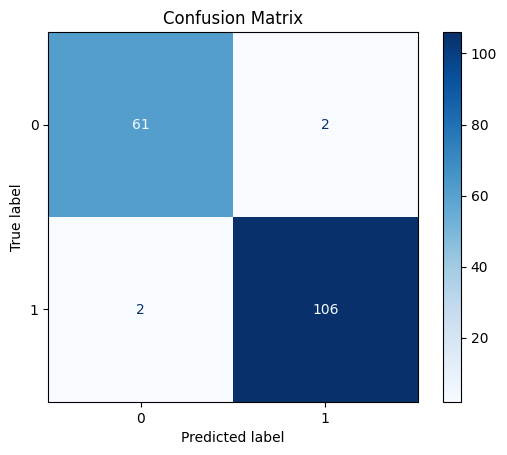

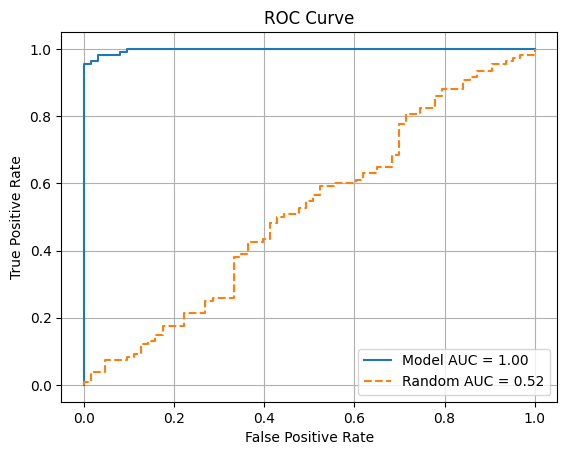

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, roc_curve, auc, ConfusionMatrixDisplay
)

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train a simple model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# 4. Predictions and probabilities
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # For ROC

# 5. Confusion matrix values
TP = np.sum((y_test == 1) & (y_pred == 1))
TN = np.sum((y_test == 0) & (y_pred == 0))
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))

# 6. Manual metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
npv = TN / (TN + FN) if (TN + FN) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
mcc = ((TP * TN) - (FP * FN)) / np.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))

# 7. Print results
print("=== Manual Calculations ===")
print(f"TP={TP}, TN={TN}, FP={FP}, FN={FN}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Negative Predictive Value: {npv:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")

print("\n=== Sklearn Metrics ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"MCC: {matthews_corrcoef(y_test, y_pred):.4f}")

# 8. Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# 9. ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Random guess comparison
random_probs = np.random.rand(len(y_test))
fpr_rand, tpr_rand, _ = roc_curve(y_test, random_probs)
auc_rand = auc(fpr_rand, tpr_rand)

# Plot ROC
plt.plot(fpr, tpr, label=f'Model AUC = {roc_auc:.2f}')
plt.plot(fpr_rand, tpr_rand, linestyle='--', label=f'Random AUC = {auc_rand:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import( confusion_matrix,
accuracy_score, recall_score, f1_score,matthews_corrcoef,precision_score,ConfusionMatrixDisplay,roc_curve, auc)
from sklearn.datasets import load_breast_cancer

#load dataset
data= load_breast_cancer()
X=data.data
Y=data.target

#split data
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)


In [41]:
#simple model
model=LogisticRegression(max_iter=10000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [42]:
y_pred=model.predict(x_test)
y_proba=model.predict_proba(x_test)[:,1]

In [43]:
TP = np.sum((y_test==1) & (y_pred==1))
TN = np.sum((y_test==0) & (y_pred==0))
FP = np.sum((y_test==0) & (y_pred==1))
FN = np.sum((y_test==1) & (y_pred==0))

In [44]:
# metrics calculation

accuracy=(TP+TN)/(TP+TN+FP+FN)
precision= TP/(TP+FP) if (TP+FP) > 0 else 0
recall = TP/(TP+FN)  if   (TP+FN) > 0 else 0
specificity = TN/(TN+FN) if (TN+FN) > 0 else 0
npv = TN/(TN+FP) if (TN+FP) > 0 else 0
F1_scr = 2 * (precision * recall)/(precision + recall) if (precision + recall) > 0 else 0
mcc = ((TP * TN)-(FP * FN))/np.sqrt((TP + FP)*(TP + FN) * (TN + FP)*(TN + FN))   

In [45]:
print(f" TP = {TP}, TN = {TN}, FP = {FP}, FN = {FN}")
print(f" Accuracy = {accuracy : .4f}")
print(f" Precision = {precision : .4f}")
print(f" Recall = {recall: .4f}")
print(f" Specificity = {specificity:.4f}")
print(f" Negative Predicted Value = {npv:.4f}")
print(f" F1_Score  = {F1_scr:.4f}")
print(f" MCC = {mcc:.4f}")


 TP = 106, TN = 61, FP = 2, FN = 2
 Accuracy =  0.9766
 Precision =  0.9815
 Recall =  0.9815
 Specificity = 0.9683
 Negative Predicted Value = 0.9683
 F1_Score  = 0.9815
 MCC = 0.9497


In [46]:
print(f" {accuracy_score(y_test,y_pred):.4f}")
print(f" {precision_score(y_test,y_pred):.4f}")
print(f" {recall_score(y_test,y_pred):.4f}")
print(f" {f1_score(y_test,y_pred):.4f}")
print(f" {matthews_corrcoef(y_test,y_pred):.4f}")

 0.9766
 0.9815
 0.9815
 0.9815
 0.9497


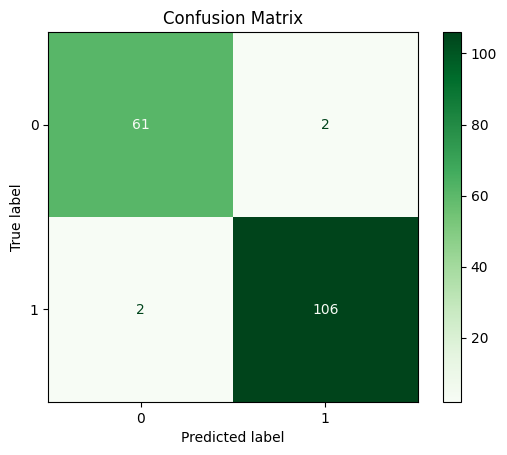

In [51]:
#confusin matrix

cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Greens")
plt.title("Confusion Matrix")
plt.show()

In [53]:
# roc curve

fpr,tpr,_=roc_curve(y_test,y_proba)
roc_auc= auc(fpr,tpr)

In [54]:
random_prob=np.random.rand(len(y_test))
fpr_rand, tpr_rand,_= roc_curve(y_test,random_prob)
auc_rand= auc(fpr_rand,tpr_rand)

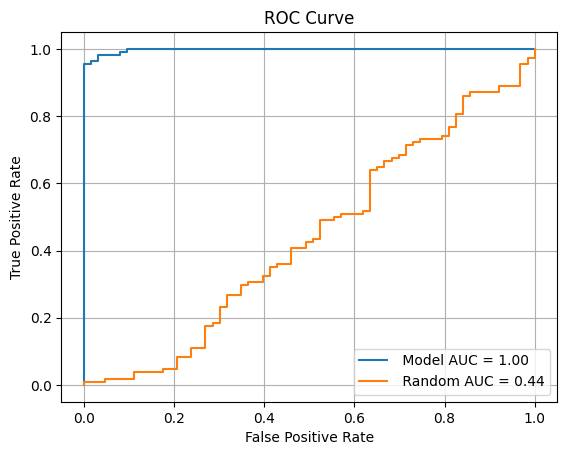

In [60]:
plt.plot(fpr,tpr,label=f" Model AUC = {roc_auc:.2f}")
plt.plot(fpr_rand, tpr_rand,label=f" Random AUC = {auc_rand:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()